In [121]:
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt

# Testing

In [7]:
N = 100

In [12]:
M = [i for i in range(100, 10100, 100)]

In [90]:
X1 = np.random.randint(1, N+1, size=M[0])
X2 = np.random.randint(1, N+1, size=M[0])

In [91]:
print('X1=\n', X1, '\n')
print('X2=\n', X2)

X1=
 [43 70 85  1 15 85 20 55 81 18 92 56 13  1 59  3 72  3 86 62 91 18 92  7 45
 81 51 34  7 87 49 20 43 99  3  7 20 87 33 20 80 32 18  9 22 65 84 17 54 29
  7 27 16 58 87 39 45 85 22 87 70 81 29 30 38 43 93 32 49 68 33 53 86 32 82
 31 96 45 69 65 60 43 20 16 96 17 89  7  1 98 50 24 31 39 22 42 19 48 78 95] 

X2=
 [ 29  71  81  20  73  98   9  44  91  82  63  47  43  14  20  79  58  75
  30  96  50   9   8  74  15  63  44  55  97   9  30  56  14  25  28  68
  55  19  51  56  23  78  49  46  20  11  97  20  29  96  34  37  77  38
   8  44   4  80  16  19  26  93  19  38 100  13   6  43  81  47  43  46
  87  79  88  57  27  22  96  36  25  20  15   7  46  77  13  31  49  84
  86  99  26  78  56  49  23  52  41  32]


In [80]:
def compute_X(X1, X2):
    X = []
    for i in range(X1.size):
        X.append(max(X1[i], X2[i]) - X1[i])
    return np.array(X)

In [87]:
X = compute_X(X1, X2)
print(X)

[ 0 61 22 37 24 10  0  0  0  0  5 39 34  0  0  0  2 29  0 25  0  0  0  1 12
  0 31  0 37  0  0  0  0  0  0  0 18 48  0 38  6  0 83 19  0  0 66  0  2 24
  0 21 20 21  0 25  0  0 23  0  0  0 30  4  0  0 37  0 71  0  0  0  0  0  0
  0  0  0 15 21 69 47 52  0 20  0 70 39  0  0 35 28  0  0 14  0  1  0 83 25]


In [82]:
np.mean(X)

14.44

In [83]:
np.var(X)

449.82640000000009

In [84]:
np.cov(X, X1)

array([[ 454.37010101, -395.45414141],
       [-395.45414141,  771.07262626]])

In [85]:
np.cov(X, X1)[1, 0]

-395.45414141414142

In [86]:
entropy(X, base=2)

5.1956147924305549

# Question 1

## 1.1 E(X)

In [189]:
summation = 0
for i in range(1, 100):
    summation += sum(range(1, 100 - i))
print('Expectation =', float(summation) / 10000)

Expectation = 16.17


## 1.2 Var(X)

In [200]:
expectation = 16.17
summation = 0
for i in range(1, 100):
    summation += sum([i**2 for i in range(1, 100 - i)])
print('Variance =', float(summation) / 10000 - expectation**2)

Variance = 538.9460999999999


## 1.3 Cov(X, X1)

In [224]:
E_X = 16.17
E_X1 = sum(range(1, 101))/100.0
summation = 0
for x1 in range(1, 101):
    for x2 in range(1, 101):
        x = max(x1, x2) - x1
        summation += (x - E_X)*(x1 - E_X1)
print('Covariance(X, X1) =', float(summation) / 10000)

Covariance(X, X1) = -416.6250000000045


# Question 2

In [51]:
N = 100
M = [i for i in range(100, 10100, 100)]

In [55]:
def compute_X(X1, X2):
    '''X = max(X1, X2) - X1
    '''
    X = []
    for i in range(X1.size):
        X.append(max(X1[i], X2[i]) - X1[i])
    return np.array(X)

In [194]:
def plot_E(Y, X, file):
    '''Plot expectation
    Attributes:
        Y (list):   Y value
        X (list):   X value
        file (str): save the plot with filename file
    '''
    expectation = np.array([16.17 for i in range(100)])
    
    plt.figure(figsize=(14, 9))
    plt.plot(X, Y)
    plt.plot(X, expectation)
    plt.xlabel('M', fontsize=30)
    plt.ylabel('Expectation', fontsize=30)
    plt.ylim([0, 20])
    plt.xlim([0, 10000])
    plt.yticks(np.arange(2, 24, 2))
    plt.xticks(np.arange(0, 11000, 1000))
    plt.savefig(file)
    plt.show()

In [201]:
def plot_V(Y, X, file):
    '''Plot variance
    Attributes:
        Y (list): Y value
        X (list): X value        
        file (str): save the plot with filename file
    '''
    variance = np.array([538.946 for i in range(100)])

    plt.figure(figsize=(14, 9))
    plt.plot(X, Y)
    plt.plot(X, variance)
    plt.xlabel('M', fontsize=30)
    plt.ylabel('Variance', fontsize=30)
    plt.ylim([0, 700])
    plt.xlim([0, 10000])
    plt.yticks(np.arange(100, 800, 100))
    plt.xticks(np.arange(0, 11000, 1000))
    plt.savefig(file)
    plt.show()

In [212]:
def plot_C(Y, X, file):
    '''Plot covariance
    Attributes:
        Y (list): Y value
        X (list): X value
        file (str): save the plot with filename file
    '''
    covariance = np.array([-416.625 for i in range(100)])

    plt.figure(figsize=(14, 9))
    plt.plot(X, Y)
    plt.plot(X, covariance)
    plt.xlabel('M', fontsize=30)
    plt.ylabel('Covariance', fontsize=30)
    plt.ylim([-600, 0])
    plt.xlim([0, 10000])
    plt.yticks(np.arange(-600, 50, 50))
    plt.xticks(np.arange(0, 11000, 1000))
    plt.savefig(file)
    plt.show()

In [177]:
def plot_H(Y, X, file):
    '''Plot entropy
    Attributes:
        Y (list): Y value
        X (list): X value
        file (str): save the plot with filename file
    '''
    plt.figure(figsize=(14, 9))
    plt.plot(X, Y)
    plt.xlabel('M', fontsize=30)
    plt.ylabel('Entropy', fontsize=30)
    plt.ylim([0, 12])
    plt.xlim([0, 10000])
    plt.yticks(np.arange(1, 13, 1))
    plt.xticks(np.arange(0, 11000, 1000))
    plt.savefig(file)
    plt.show()

In [179]:
def question2(N, M):
    E, V, C, H = [], [], [], []  # Expectation, Variance, Covariance, Entropy
    for m in M:
        X1 = np.random.randint(1, N+1, size=m)
        X2 = np.random.randint(1, N+1, size=m)
        X = compute_X(X1, X2)
        E.append(np.mean(X))
        V.append(np.var(X))
        C.append(np.cov(X, X1)[1, 0])
        H.append(entropy(X, base=2))
    plot_E(E, M, 'expectation.pdf')
    plot_V(V, M, 'variance.pdf')
    plot_C(C, M, 'covariance.pdf')
    plot_H(H, M, 'entropy.pdf')

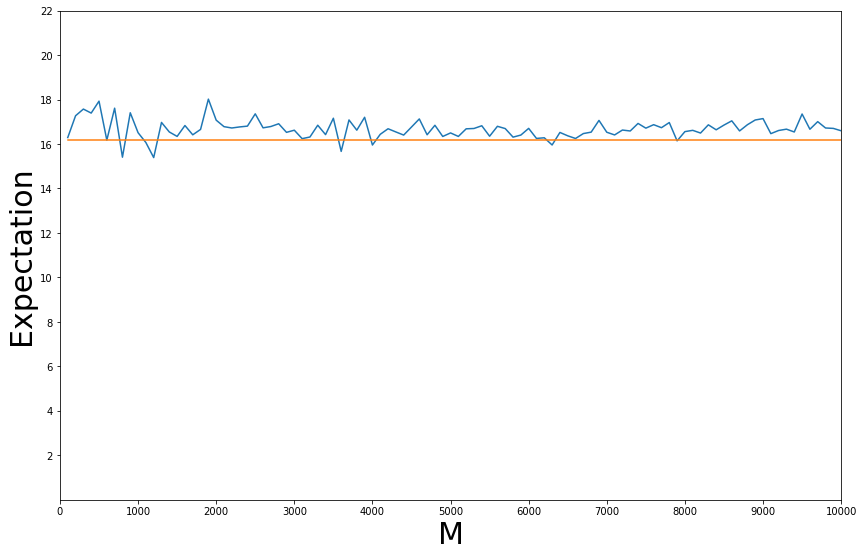

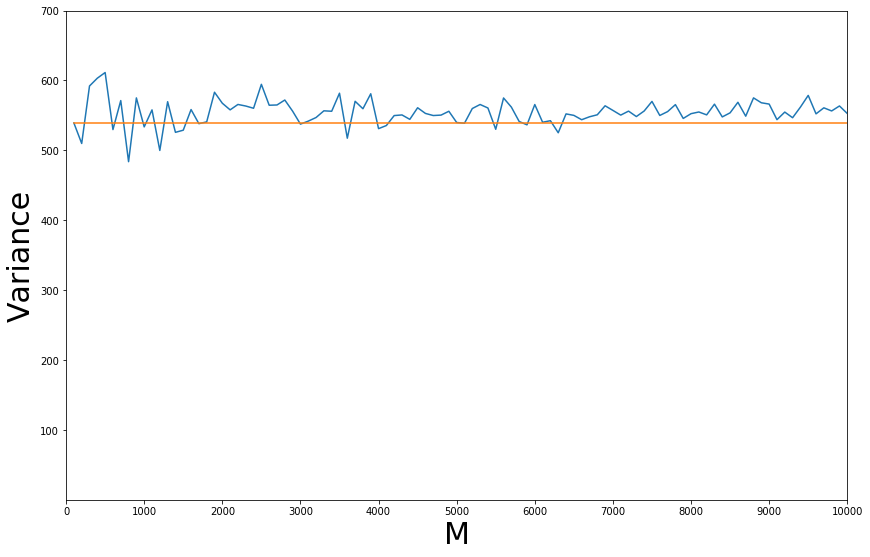

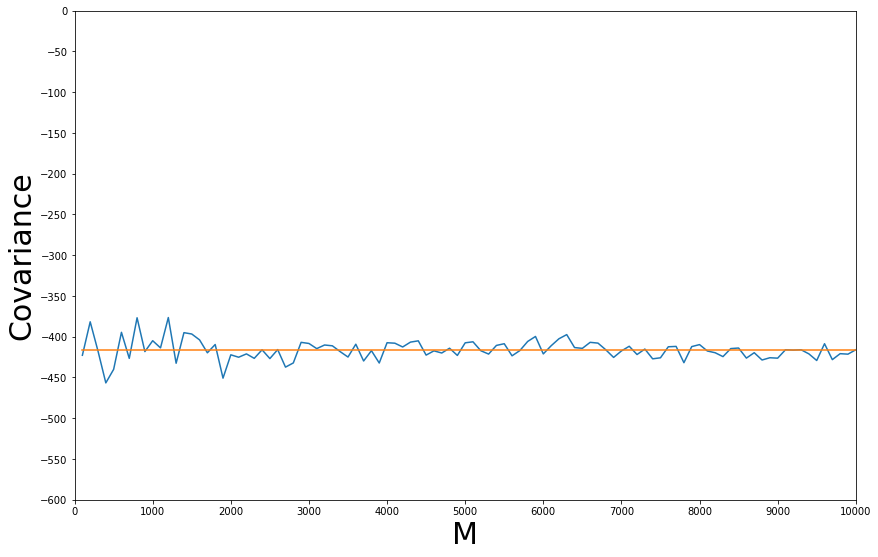

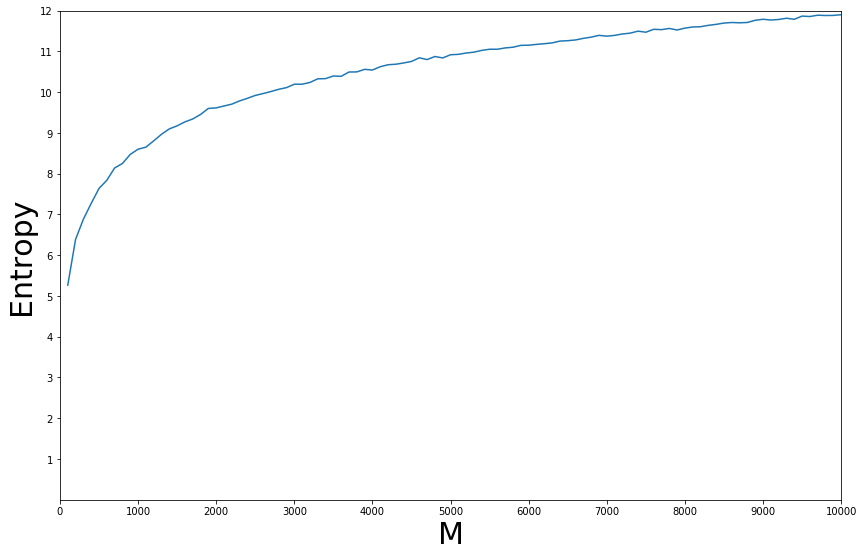

In [222]:
question2(N, M)